# Kinetic modeling of batch fermentation for mixed-sugar to ethanol production

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd # read csv file
import math

In [2]:
ft = 16
plt.rcParams.update({'font.size':ft})

### Parâmetros adotados

<img src="foto 1.png" width=800 height=800 />

#### Equações usadas

<img src="foto 2.png" width=500 height=500 />

In [3]:
t0 = 0 # h
tf = 8 # h
t = np.linspace(t0,tf,100)
print(t)

[0.         0.08080808 0.16161616 0.24242424 0.32323232 0.4040404
 0.48484848 0.56565657 0.64646465 0.72727273 0.80808081 0.88888889
 0.96969697 1.05050505 1.13131313 1.21212121 1.29292929 1.37373737
 1.45454545 1.53535354 1.61616162 1.6969697  1.77777778 1.85858586
 1.93939394 2.02020202 2.1010101  2.18181818 2.26262626 2.34343434
 2.42424242 2.50505051 2.58585859 2.66666667 2.74747475 2.82828283
 2.90909091 2.98989899 3.07070707 3.15151515 3.23232323 3.31313131
 3.39393939 3.47474747 3.55555556 3.63636364 3.71717172 3.7979798
 3.87878788 3.95959596 4.04040404 4.12121212 4.2020202  4.28282828
 4.36363636 4.44444444 4.52525253 4.60606061 4.68686869 4.76767677
 4.84848485 4.92929293 5.01010101 5.09090909 5.17171717 5.25252525
 5.33333333 5.41414141 5.49494949 5.57575758 5.65656566 5.73737374
 5.81818182 5.8989899  5.97979798 6.06060606 6.14141414 6.22222222
 6.3030303  6.38383838 6.46464646 6.54545455 6.62626263 6.70707071
 6.78787879 6.86868687 6.94949495 7.03030303 7.11111111 7.191919

In [4]:
# parametros fornecidos:

b1=4.4417
a14=0.2446
a32=-0.0314
a51=0.0414

b2=-2.7831
a15=-2.6482
a33=0.5557
a52=-0.0257

b3= -0.6319
a22 = -0.8030
a34 = -0.0534
a53= 0.0431

b4 = 0.0208
a23= -4.9893
a41= 0.7706
a55 = 0.0224

b5= -0.1770
a24= 0.5254
a42 = 0.0694

a11= -0.8496
a25= 0.2266
a43= 3.5344

a13= -2.4528
a31= 0.0547
a44= - 0.4048


X= 50 #g/L  Concentração inicial de açucar
X10= X/2 # Supondo divisão 1:1 glicose: glicose
X20= X/2 # Supondo divisão 1:1 glicose: frutose
X30= 0.1 # Supondo concentração inicial de biomassa
X40= 0.1 # Supondo concentração inicial de etanol
X50= 0.1# Supondo concentração inicial de glicerol

In [5]:
NVEnt = 6 # CA,CB,CC,CD,CE, Temperatura
VarEnt = np.zeros(NVEnt)

In [6]:
def reac2(Y,t):
    NEq = len(Y)
    
    X1 = Y[0]
    X2 = Y[1]
    X3 = Y[2]
    X4 = Y[3]
    X5 = Y[4]
    

    dYdt = np.zeros(NEq)
    
    
    dYdt[0] = -b1+a11*(np.log(X1))+a13*(np.log(X3))+a14*(np.log(X4))+a15*(np.log(X5)) #glucose 
    dYdt[1] = -b2+a22*np.log(X2)+a23*np.log(X3)+a24*np.log(X4)+a25*np.log(X5) #frutose
    dYdt[2] = -b3+a31*np.log(X1)+a32*np.log(X2)+a33*np.log(X3)+a34*np.log(X4) #biomassa
    dYdt[3] = -b4+a41*np.log(X1)+a42*np.log(X2)+a43*np.log(X3)+a44*np.log(X4) #etanol
    dYdt[4] = -b5+a51*np.log(X1)+a52*np.log(X2)+a53*np.log(X3)+a55*np.log(X5) #glicerol
    
   
    return dYdt

In [7]:
np.log(X10)

3.2188758248682006

## Para concentração inicial de açúcar igual a 50g/L

In [8]:
CI2 = [X10,X20,X30,X40,X50]
CI2

[25.0, 25.0, 0.1, 0.1, 0.1]

In [9]:
sol2 = odeint(reac2, CI2, t)

In [10]:
X1 = sol2[:,0]
X2 = sol2[:,1]
X3 = sol2[:,2]
X4 = sol2[:,3]
X5 = sol2[:,4]

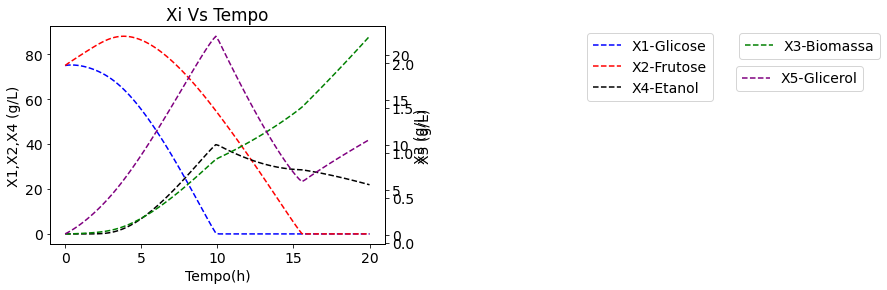

In [23]:
fig,ax=plt.subplots()

plt.title('Xi Vs Tempo')
ax.set_xlabel('Tempo(h)')
ax.set_ylabel('X1,X2,X4 (g/L)')
ax.plot(t,X1,color='blue',label='X1-Glicose',linestyle='--')
ax.plot(t,X2,color='red',label='X2-Frutose',linestyle='--')
ax.plot(t,X4,color='black',label='X4-Etanol',linestyle='--')


ax2 = ax.twinx()
ax2.set_ylabel('X3 (g/L)')
ax2.plot(t,X3,color='green',label='X3-Biomassa',linestyle='--')


ax3 = ax.twinx()
# ax3.spines.right.set_position(('axes',1.5))
ax3.set_ylabel ('X5 (g/L)')
ax3.plot(t,X5,color='purple',label='X5-Glicerol',linestyle='--')


ax.legend(loc='upper right',bbox_to_anchor=(2,1))
ax2.legend(loc='upper right',bbox_to_anchor=(2.5,1))
ax3.legend(loc='upper right',bbox_to_anchor=(2.45,0.85))


plt.show()

### Gráfico do artigo

<img src="foto 3.png" width=500 height=500 />

## Para concentração inicial de açúcar igual a 150g/L

In [12]:
t0 = 0 # h
tf = 20 # h
t = np.linspace(t0,tf,100)
print(t)

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16

In [13]:
X= 150 #g/L  Concentração inicial de açucar
X10= X/2 # Supondo divisão 1:1 glicose: glicose
X20= X/2 # Supondo divisão 1:1 glicose: frutose
X30= 0.1 # Supondo concentração inicial de biomassa
X40= 0.1 # Supondo concentração inicial de etanol
X50= 0.1# Supondo concentração inicial de glicerol

In [14]:
CI2 = [X10,X20,X30,X40,X50]
CI2

[75.0, 75.0, 0.1, 0.1, 0.1]

In [15]:
sol2 = odeint(reac2, CI2, t)

In [16]:
X1 = sol2[:,0]
X2 = sol2[:,1]
X3 = sol2[:,2]
X4 = sol2[:,3]
X5 = sol2[:,4]

### Gráfico Gerado

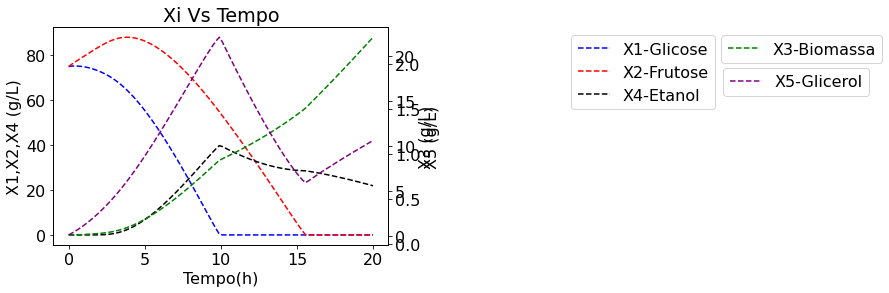

In [17]:
fig,ax=plt.subplots()

plt.title('Xi Vs Tempo')
ax.set_xlabel('Tempo(h)')
ax.set_ylabel('X1,X2,X4 (g/L)')
ax.plot(t,X1,color='blue',label='X1-Glicose',linestyle='--')
ax.plot(t,X2,color='red',label='X2-Frutose',linestyle='--')
ax.plot(t,X4,color='black',label='X4-Etanol',linestyle='--')


ax2 = ax.twinx()
ax2.set_ylabel('X3 (g/L)')
ax2.plot(t,X3,color='green',label='X3-Biomassa',linestyle='--')


ax3 = ax.twinx()
# ax3.spines.right.set_position(('axes',1.5))
ax3.set_ylabel ('X5 (g/L)')
ax3.plot(t,X5,color='purple',label='X5-Glicerol',linestyle='--')

ax.legend(loc='upper right',bbox_to_anchor=(2,1))
ax2.legend(loc='upper right',bbox_to_anchor=(2.5,1))
ax3.legend(loc='upper right',bbox_to_anchor=(2.46,0.85))


plt.show()

### Gráfico do artigo

<img src="foto 4.png" width=500 height=500 />